<a href="https://colab.research.google.com/github/SakshatVacche/CodSoft/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving advertising.csv to advertising (1).csv


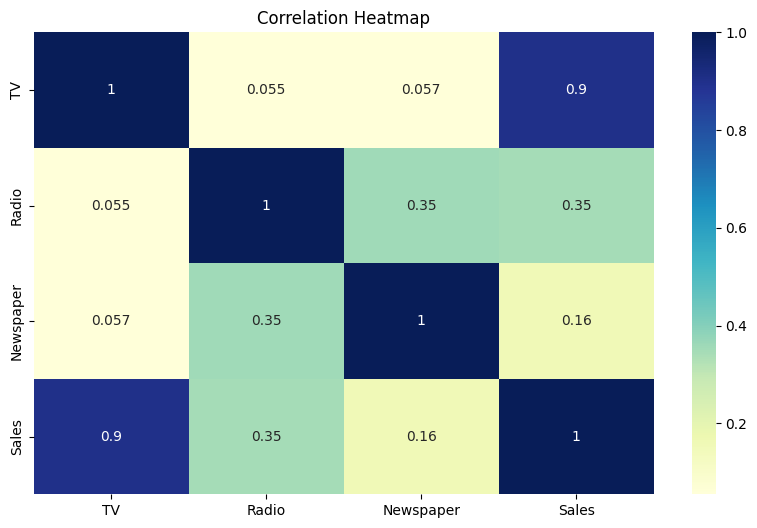

Mean Absolute Error: 1.27
Root Mean Squared Error: 1.71
R² Score: 0.91


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

# Upload and read the CSV
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

# Handle 'Date' column if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

# Plot sales over time if date exists
if 'Date' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby('Date')['Sales'].sum().plot()
    plt.title("Sales Over Time")
    plt.ylabel("Sales")
    plt.show()

# Prepare features and target
y = df['Sales']
X = df.drop(['Sales'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Root Mean Squared Error:", round(rmse, 2))
print("R² Score:", round(r2, 2))
